# PART 1

In [43]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tsfresh import extract_features
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, roc_auc_score
import torch.nn.functional as F

## 1.1 - dataset exploration

In [2]:
# step 1 - take data
PTB_train = pd.read_csv("./datasets/ptbdb_train.csv")
PTB_test = pd.read_csv("./datasets/ptbdb_test.csv")

column_names = [f"time{i}" for i in range(187)] + ["Class"]

PTB_train.columns = column_names
PTB_test.columns = column_names

In [3]:
# step 2 - basic dataset exploration
print("Dataset dimensions:", PTB_train.shape)
print('--------------------------------')
print("Number of missing values:")
print(PTB_train.isnull().sum())

Dataset dimensions: (11640, 188)
--------------------------------
Number of missing values:
time0      0
time1      0
time2      0
time3      0
time4      0
          ..
time183    0
time184    0
time185    0
time186    0
Class      0
Length: 188, dtype: int64


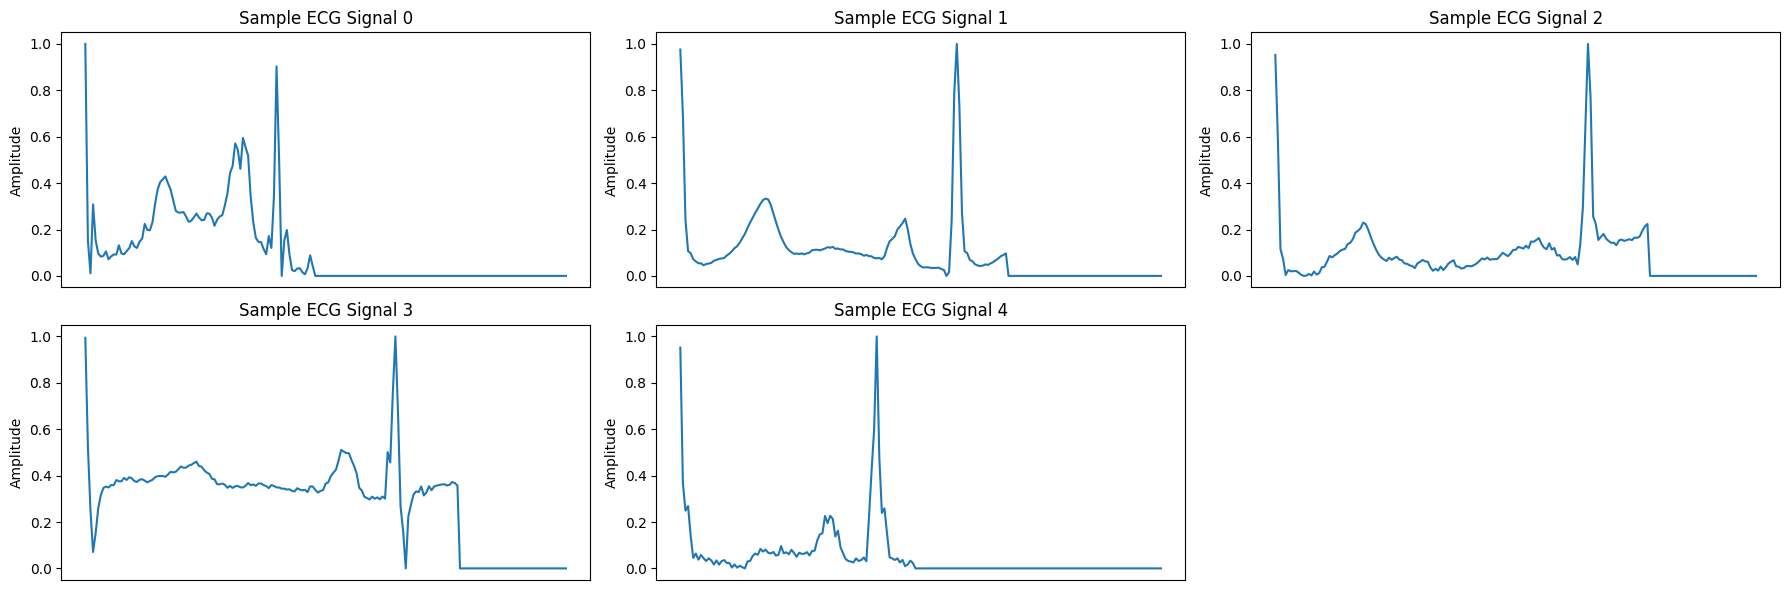

In [4]:
# step3 - data Visualization
plt.figure(figsize=(18, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.lineplot(data=PTB_train.iloc[i, :-1])
    plt.title(f"Sample ECG Signal {i}")
    plt.ylabel("Amplitude")
    plt.xticks([])
plt.tight_layout()
plt.show()

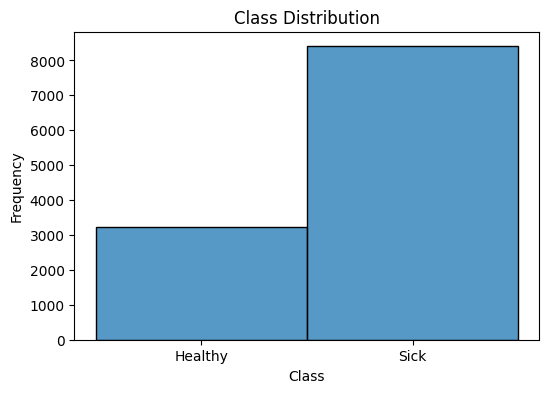

In [5]:
# step 4 - class distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=PTB_train, x="Class", bins=2, edgecolor='black')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.xticks([0.25, 0.75], ['Healthy', 'Sick'])
plt.show()

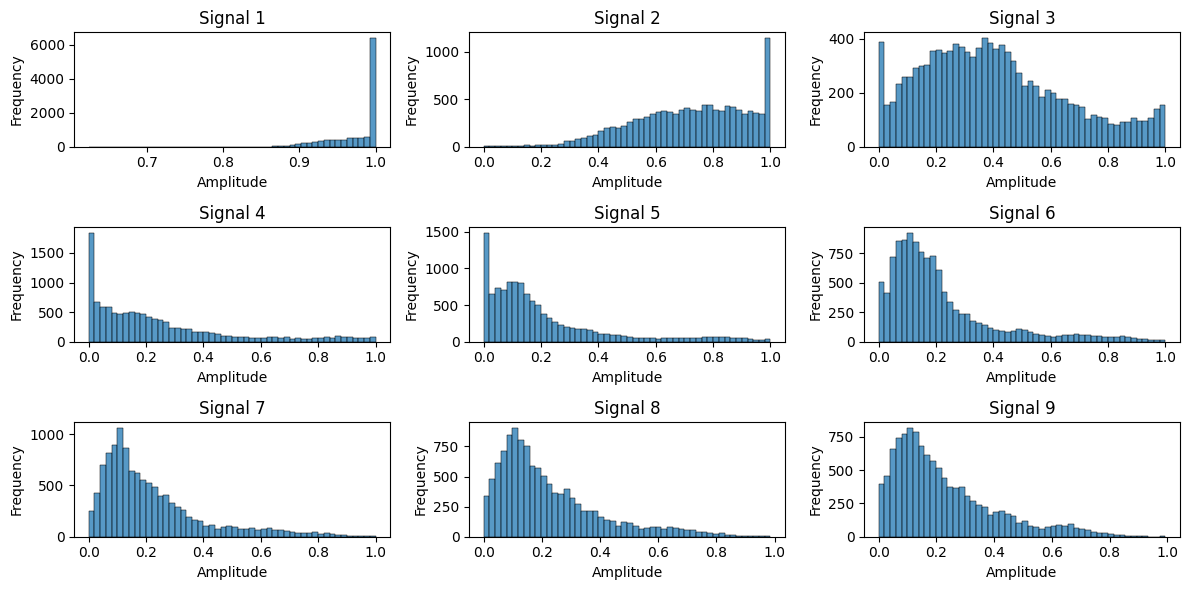

In [6]:
# step 4 - signal histogram
plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=PTB_train, x=f"time{i}", bins=50, edgecolor='black')
    plt.title(f"Signal {i+1}")
    plt.xlabel("Amplitude")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [33]:
# step 5 - split in train and test data
X_train = PTB_train.iloc[:,:-1]
y_train = PTB_train.iloc[:,-1]
X_test = PTB_test.iloc[:,:-1]
y_test = PTB_test.iloc[:,-1]
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [8]:
# step 6 - metrics for classification tasks
# logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metric 1: F1-score
f1 = f1_score(y_test, y_pred)

# metric 2: AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

print("F1-score:", f1)
print("AUC-ROC score:", auc_roc)


F1-score: 0.8814102564102564
AUC-ROC score: 0.7468823892379722


/Users/neo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 1.2 ML methods

In [9]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_f1_score = f1_score(y_test, rf_pred)
rf_AUC_ROC = roc_auc_score(y_test, rf_pred)

# Train a Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
lr_pred = lr_classifier.predict(X_test)
lr_f1_score = f1_score(y_test, lr_pred)
lr_AUC_ROC = roc_auc_score(y_test, lr_pred)

print("Random Forest Classifier F1 score:", rf_f1_score)
print("Random Forest Classifier AUC-ROC score:", rf_AUC_ROC)
print('--------------------------------')
print("Logistic Regression F1 score:", lr_f1_score)
print("Logistic Regression AUC_ROC score:", lr_AUC_ROC)


Random Forest Classifier F1 score: 0.9785326728001887
Random Forest Classifier AUC-ROC score: 0.9543545279837214
--------------------------------
Logistic Regression F1 score: 0.8814102564102564
Logistic Regression AUC_ROC score: 0.7468823892379722


/Users/neo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
''' work in progress

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
unique_ids = np.arange(PTB_train.shape[0]) 
PTB_train.insert(0, 'unique_id', unique_ids) 
print(PTB_train)

X = PTB_train.iloc[:, :-1]
y = PTB_train.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
extracted_features = extract_features(X_train[:10], column_id='unique_id')
segment_size = 10
segments = [PTB_train[i:i+segment_size] for i in range(0, len(PTB_train), segment_size)]
extracted_features = []
for segment in segments:
    features = extract_features(segment, column_id='unique_id', default_fc_parameters=None)
    features = impute(features)
    extracted_features.append(features)
combined_features = pd.concat(extracted_features)

#fai stessa cosa per test

rf_classifier.fit(X_train_features, y_train)
lr_classifier.fit(X_train_features, y_train)

rf_pred_features = rf_classifier.predict(X_test_features)
lr_pred_features = lr_classifier.predict(X_test_features)

rf_accuracy_features = accuracy_score(y_test, rf_pred_features)
lr_accuracy_features = accuracy_score(y_test, lr_pred_features)

print("Random Forest Classifier Accuracy (with additional features):", rf_accuracy_features)
print("Logistic Regression Classifier Accuracy (with additional features):", lr_accuracy_features)


'''

### 1.3 - RNN

### 1.4 - CNN

In [46]:
# step 1 - adapt data to pytorch CNN
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# step 2 -  Vanilla CNN model
class VanillaCNN(nn.Module):
    def __init__(self, input_length):
        super(VanillaCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * (input_length // 4), 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.conv1(x.unsqueeze(1)))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool1d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# step 3 - Residual CNN model
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.downsample(identity)
        out = self.relu(out)
        return out

class ResidualCNN(nn.Module):
    def __init__(self, input_length):
        super(ResidualCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self.make_layer(64, 64, 3)
        self.layer2 = self.make_layer(64, 128, 3)
        self.layer3 = self.make_layer(128, 256, 3)
        self.fc = nn.Linear(256 * 47, 2)


    def make_layer(self, in_channels, out_channels, num_blocks):
        layers = []
        for _ in range(num_blocks):
            layers.append(ResidualBlock(in_channels, out_channels))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x.unsqueeze(1))
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


# step 4 - train loop
def train(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    
    epoch_loss = running_loss / len(dataloader.dataset)
    f1 = f1_score(all_labels, all_preds)
    auc_roc = roc_auc_score(all_labels, all_preds)
    
    return epoch_loss, f1, auc_roc

# step 5 - test loop
def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    epoch_loss = running_loss / len(dataloader.dataset)
    f1 = f1_score(all_labels, all_preds)
    auc_roc = roc_auc_score(all_labels, all_preds)
    
    return epoch_loss, f1, auc_roc



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_length = 187
vanilla_model = VanillaCNN(input_length).to(device)
residual_model = ResidualCNN(input_length).to(device)
num_epochs = 10
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
vanilla_optimizer = optim.Adam(vanilla_model.parameters(), lr=learning_rate)
residual_optimizer = optim.Adam(residual_model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_loss, train_f1, train_auc_roc = train(vanilla_model, train_loader, vanilla_optimizer, criterion, device)
    test_loss, test_f1, test_auc_roc = evaluate(vanilla_model, test_loader, criterion, device)
    print(f"Epoch [{epoch+1}/{num_epochs}], Vanilla CNN - Train Loss: {train_loss:.4f}, Train F1: {train_f1:.4f}, Train AUC ROC: {train_auc_roc:.4f}, Test Loss: {test_loss:.4f}, Test F1: {test_f1:.4f}, Test AUC ROC: {test_auc_roc:.4f}")
for epoch in range(num_epochs):
    train_loss, train_f1, train_auc_roc = train(residual_model, train_loader, residual_optimizer, criterion, device)
    test_loss, test_f1, test_auc_roc = evaluate(residual_model, test_loader, criterion, device)
    print(f"Epoch [{epoch+1}/{num_epochs}], Residual CNN - Train Loss: {train_loss:.4f}, Train F1: {train_f1:.4f}, Train AUC ROC: {train_auc_roc:.4f}, Test Loss: {test_loss:.4f}, Test F1: {test_f1:.4f}, Test AUC ROC: {test_auc_roc:.4f}")

/var/folders/8w/nwb14j3528z683xrv4rw0j4r0000gn/T/ipykernel_13944/2358076042.py:3: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  y_train_tensor = torch.tensor(y_train, dtype=torch.long)
/var/folders/8w/nwb14j3528z683xrv4rw0j4r0000gn/T/ipykernel_13944/2358076042.py:5: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  y_test_tensor = torch.tensor(y_test, dtype=torch.long)


Epoch [1/10], Vanilla CNN - Train Loss: 0.4333, Train F1: 0.8561, Train AUC ROC: 0.6908, Test Loss: 0.3657, Test F1: 0.8757, Test AUC ROC: 0.8166
Epoch [2/10], Vanilla CNN - Train Loss: 0.3450, Train F1: 0.8910, Train AUC ROC: 0.8087, Test Loss: 0.3036, Test F1: 0.9106, Test AUC ROC: 0.8389
Epoch [3/10], Vanilla CNN - Train Loss: 0.2783, Train F1: 0.9224, Train AUC ROC: 0.8637, Test Loss: 0.2592, Test F1: 0.9259, Test AUC ROC: 0.8917
Epoch [4/10], Vanilla CNN - Train Loss: 0.2084, Train F1: 0.9465, Train AUC ROC: 0.9027, Test Loss: 0.2171, Test F1: 0.9395, Test AUC ROC: 0.9172
Epoch [5/10], Vanilla CNN - Train Loss: 0.1679, Train F1: 0.9581, Train AUC ROC: 0.9243, Test Loss: 0.2060, Test F1: 0.9504, Test AUC ROC: 0.8878
Epoch [6/10], Vanilla CNN - Train Loss: 0.1482, Train F1: 0.9624, Train AUC ROC: 0.9316, Test Loss: 0.1592, Test F1: 0.9623, Test AUC ROC: 0.9242
Epoch [7/10], Vanilla CNN - Train Loss: 0.1224, Train F1: 0.9698, Train AUC ROC: 0.9469, Test Loss: 0.1622, Test F1: 0.9617,